In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\noufi\Downloads\Fraud.csv")
data.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.shape

(6362620, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
fraudcount = data['isFraud'].value_counts()
fraudcount

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
import matplotlib.pyplot as plt

In [8]:
typecount = data['type'].value_counts()
typecount

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

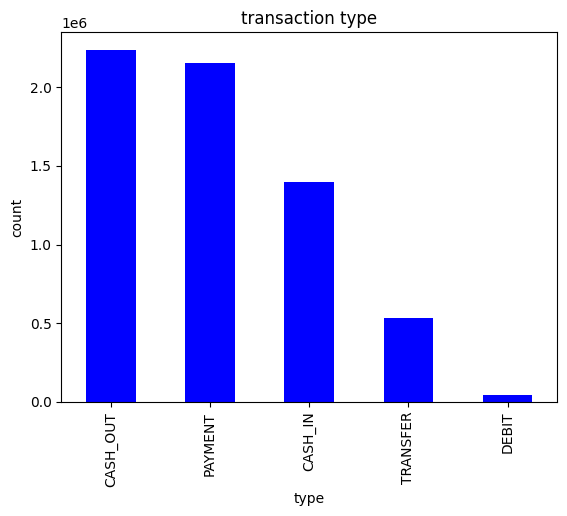

In [9]:
typecount.plot(kind="bar", color='blue')
plt.xlabel("type")
plt.ylabel("count")
plt.title("transaction type")
plt.show()

In [10]:
fraudbytype = data.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraudbytype

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

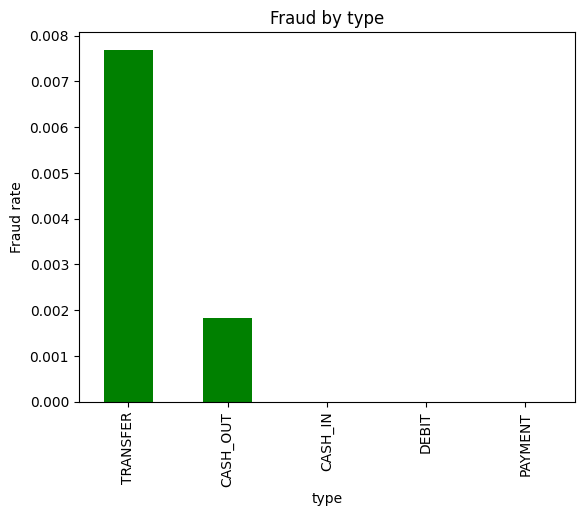

In [11]:
fraudbytype.plot(kind="bar",color='green')
plt.xlabel("type")
plt.ylabel("Fraud rate")
plt.title("Fraud by type")
plt.show()

In [12]:
#outlier
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")


amount: 338078 outliers
oldbalanceOrg: 1112507 outliers
newbalanceOrig: 1053391 outliers
oldbalanceDest: 786135 outliers
newbalanceDest: 738527 outliers


In [13]:
data['balanceDiffOrig'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['balanceDiffDest'] = data['newbalanceDest'] - data['oldbalanceDest']

In [14]:
(data['balanceDiffOrig']<0).sum()

np.int64(1399253)

In [15]:
(data['balanceDiffDest']< 0) .sum()

np.int64(1238864)

In [16]:
fraud = data[data["type"].isin(["TRANSFER","CASH_OUT"])]
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [17]:
fraud["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

In [18]:
import seaborn as sns

<Axes: xlabel='type', ylabel='count'>

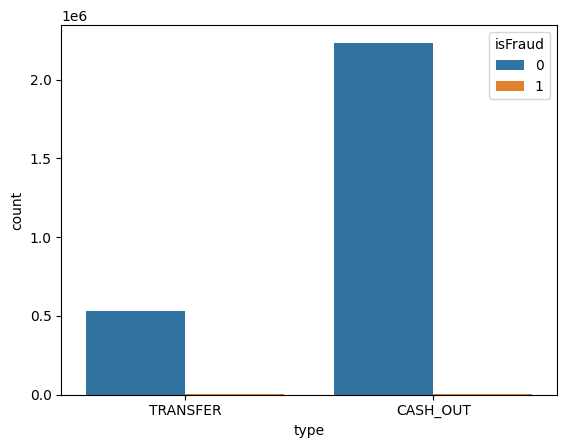

In [19]:
sns.countplot(data=fraud,x="type",hue="isFraud")

In [20]:
data.drop(columns="step",inplace=True)
data.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


<Axes: >

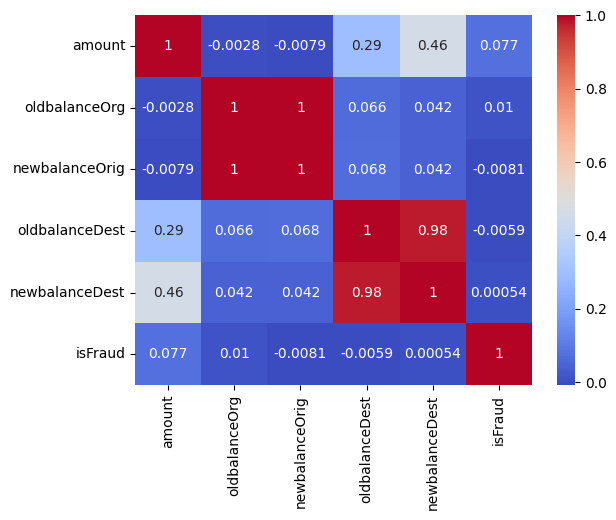

In [21]:
numeric_data = data[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]]

corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [22]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


In [24]:
df = fraud.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,181.0,0.00
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,181.0,-21182.00
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,15325.0,46430.44
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,705.0,-22425.00
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,10835.0,2712905.89


In [25]:
numeric_col = ['amount', 'oldbalanceOrg', 'newbalanceOrig',
                    'oldbalanceDest', 'newbalanceDest']

categorical_col = ['type']

In [26]:
from sklearn.model_selection import train_test_split
y = df["isFraud"]
x = df.drop(["isFraud"],axis=1)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_col),
        ('cat', OneHotEncoder(drop='first'), categorical_col)
    ])

In [30]:
pipeline = Pipeline(
    [('preprocessor', preprocessor),
    ('clf', LogisticRegression(class_weight="balanced",max_iter=1000))
])

In [31]:
pipeline.fit(x_train, y_train)

,steps,"[('preprocessor', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [32]:
y_pred = pipeline.predict(x_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    552462
           1       0.04      0.87      0.07      1620

    accuracy                           0.94    554082
   macro avg       0.52      0.90      0.52    554082
weighted avg       1.00      0.94      0.96    554082



In [35]:
print(confusion_matrix(y_test,y_pred))

[[516879  35583]
 [   213   1407]]


In [ ]:
#0 - non-fraud
#1-fraud
#Precision: 1.00 - When the model predicts non-fraud, it's correct 100% of the time.
#Precision: 0.04 - When the model predicts fraud, it's correct only 4% of the time. This is very poor.

#Recall: 0.94 - It correctly identifies 94% of all actual non-fraud transactions.
#Recall: 0.87 - It correctly identifies 87% of all actual fraud cases. This is very good.

#F1-score: 0.97 - High balance between precision and recall.
#F1-score: 0.07 - Overall performance on fraud detection is poor due to extremely low precision.

#Support: 552,462 - Most of the data belongs to this class (majority class).
#Support: 1,620 - Very few fraud cases (class imbalance problem).

In [ ]:
#model is very good at detecting non-fraud